### Your details

Your Name:Mithun Thakkar

Your ID number:20017138

# Task 1

## Option 1

#### Symbolic calculation of the derivative and plotting 
Write two Python functions to: 

Symbolically calculate the derivative of a polynomial with one variable. 

Evaluate (i.e. get the numerical value) of a polynomial for a given value of its variable. 

Then: 

Test your code with a few salient polynomials (minimum of 3) for which you have calculated the derivative of these polynomials manually. 

Convince yourself that f'(x) ~= (f(x + h) - f(x)) / h for small values of h and a given value of x. Observe that it gets closer to the true value the smaller you make h.

Then: 

Plot the polynomial and its derivative over an arbitrary domain using matplotlib 

## Approach

(Describe the approach you took. Describe also how you used the feedback from the forums to improve your code).

## Manual Calculations

(Provide details of the manual calculations)

In [17]:
import matplotlib.pyplot as plt

In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

### The function coefficients_and_exponents extracts coefficients and exponents from a polynomial string in the format (2x^2)+((-3x^3)/3)+(4x^2)+(-3)

In [35]:
def coefficients_and_exponents(polynomial_str, print_ce = True):
    #removing brackets below 
    open_parenthesis_split = polynomial_str.split("(")
    close_parenthesis_split = []
    for i in open_parenthesis_split:
        if ")" in i:
            close_parenthesis_split.append(i.split(")")[0])
            close_parenthesis_split.append(i.split(")")[1])
        else:
            close_parenthesis_split.append(i)
    #removing + and blanks spaces below
    add_empty_split = []
    for j in close_parenthesis_split:
        if ("+" not in j) and (j!=""):
            add_empty_split.append(j)
    #after the above code add_empty_split has values that are inside the brackets
    
    
    #storing coefficients and exponents in lists
    coefficients = []
    exponents = []
    for i in add_empty_split:
        if len(i.split("x^"))==2:
            coefficients.append(i.split("x^")[0])
            exponents.append(i.split("x^")[-1])
        elif "/" in i:
            coefficients[-1]=int(coefficients[-1])/int(i[1])
        else:
            coefficients.append(i)
            exponents.append("0")
    
    #checking if coefficients include empty strings. This happens when you have a polynomial like "x+2x^2" rather than "1x+2x^2". 
    #replacing such strings with 1
    if "" in coefficients:
        empty_list = []
        b = 0
        for i in coefficients:
            if len(i)==0:
                empty_list.append(b)
            b=b+1
        for index in empty_list:
            coefficients[empty_list[index]] = 1
    
    #Checking if the user of this function has entered the polynomial in the correct format for this function to be able to 
    #fetch the coefficients and exponents
    if "-" in coefficients:
        print("Please enter Polynomial string in the format (3x^2)+(-5x+3)")
    else: 
        coefficients = list(map(int, coefficients))
        exponents = list(map(int, exponents))
        if not add_empty_split:
            print("Please enter Polynomial string with brackets around coefficients and exponents. Example: (3x^2)+(5x+3)")
        else: 
            if print_ce == True:
                print(f"Coefficients and Exponents of the polynomial: {coefficients}, {exponents}")
            return coefficients, exponents
    

In [36]:
a = "(2x^2)+((-3x^3)/3)+(4x^2)+(-3)"
poly_coef, poly_exp = coefficients_and_exponents(a)

Coefficients and Exponents of the polynomial: [2, -1, 4, -3], [2, 3, 2, 0]


### The find_derivative function calculates derivative of a polynomial

In [37]:
def find_derivative(polynomial_str, print_ce = True):
    coefficients, exponents = coefficients_and_exponents(polynomial_str, print_ce)
    for i in range(len(coefficients)):
        coefficients[i] = coefficients[i]*exponents[i]
        if exponents[i]!=0:
            exponents[i] = exponents[i]-1
    if print_ce == True: 
        print(f"Coefficients and Exponents after differentiation: {coefficients}, {exponents}")   
    x =''
    for i in range(len(coefficients)):
        x = x+"("+str(coefficients[i])+"x^"+str(exponents[i])+")"
        if i!=len(coefficients)-1:
            x = x+"+"
    print("Derivative of the function: "+x)
    return x, coefficients, exponents

### The get_numerical_value function finds numerical value of polynomial based on given value of variable x

In [38]:
def get_numerical_value(x, polynomial_str, print_ce = True):
    y = 0
    coefficients, exponents = coefficients_and_exponents(polynomial_str, print_ce)
    for i in range(len(coefficients)):
        y =y+ (coefficients[i])*(x**exponents[i])
    return y

In [43]:
#  f'(x) ~= (f(x + h) - f(x)) / h
x = 10
h = 0.1
a = "(2x^2)+((-3x^3)/3)+(4x^2)+(-3)"
derivative, der_coef, der_exp = find_derivative(a)
y = get_numerical_value(x, a, False)
y_dash = get_numerical_value(x, derivative, False)
y1 = get_numerical_value(x+h, a, False)
print(f"Numerical value of f'(x) is {y_dash} and (f(x + h) - f(x)) / h is {(y1-y)/h}")
h = 0.01
y2 = get_numerical_value(x+h, a, False)
print(f"Numerical value of f'(x) is {y_dash} and (f(x + h) - f(x)) / h is {(y2-y)/h}")
h = 0.001
y3 = get_numerical_value(x+h, a, False)
print(f"Numerical value of f'(x) is {y_dash} and (f(x + h) - f(x)) / h is {(y3-y)/h}")
h = 0.0001
y4 = get_numerical_value(x+h, a, False)
print(f"Numerical value of f'(x) is {y_dash} and (f(x + h) - f(x)) / h is {(y4-y)/h}")
h = 0.00001
y5 = get_numerical_value(x+h, a, False)
print(f"Numerical value of f'(x) is {y_dash} and (f(x + h) - f(x)) / h is {(y5-y)/h}")

Coefficients and Exponents of the polynomial: [2, -1, 4, -3], [2, 3, 2, 0]
Coefficients and Exponents after differentiation: [4, -3, 8, 0], [1, 2, 1, 0]
Derivative of the function: (4x^1)+(-3x^2)+(8x^1)+(0x^0)
Numerical value of f'(x) is -180 and (f(x + h) - f(x)) / h is -182.40999999999985
Numerical value of f'(x) is -180 and (f(x + h) - f(x)) / h is -180.24010000000317
Numerical value of f'(x) is -180 and (f(x + h) - f(x)) / h is -180.02400099993565
Numerical value of f'(x) is -180 and (f(x + h) - f(x)) / h is -180.002400010153
Numerical value of f'(x) is -180 and (f(x + h) - f(x)) / h is -180.00023999320544


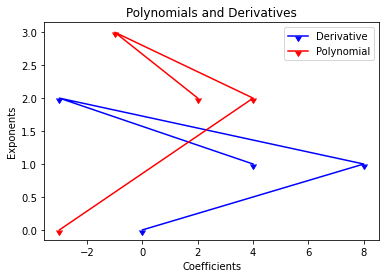

In [23]:
Derivatives, = plt.plot(der_coef, der_exp, '-b', marker=11)
Polynomials, = plt.plot(poly_coef, poly_exp, '-r', marker=11)
plt.xlabel('Coefficients')
plt.ylabel('Exponents')
plt.title('Polynomials and Derivatives')
plt.legend(handles = [Derivatives, Polynomials], labels = ['Derivative', 'Polynomial'])
plt.show()

In [24]:
x = 10
a = "(2x^2)+((-3x^3)/3)+(4x^2)+(-3)"
y = get_numerical_value(x, a)
y

Coefficients and Exponents of the polynomial: [2, -1, 4, -3], [2, 3, 2, 0]


-403

In [25]:
b = "(2x^3)+(2x^2)"
derivative, der_coef, der_exp = find_derivative(b)
poly_coef, poly_exp = coefficients_and_exponents(b)
y = get_numerical_value(x, b)
y

Coefficients and Exponents of the polynomial: [2, 2], [3, 2]
Coefficients and Exponents after differentiation: [6, 4], [2, 1]
Derivative of the function: (6x^2)+(4x^1)
Coefficients and Exponents of the polynomial: [2, 2], [3, 2]
Coefficients and Exponents of the polynomial: [2, 2], [3, 2]


2200

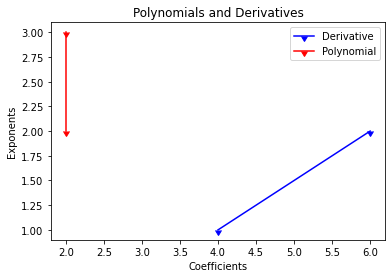

In [26]:
Derivatives, = plt.plot(der_coef, der_exp, '-b', marker=11)
Polynomials, = plt.plot(poly_coef, poly_exp, '-r', marker=11)
plt.xlabel('Coefficients')
plt.ylabel('Exponents')
plt.title('Polynomials and Derivatives')
plt.legend(handles = [Derivatives, Polynomials], labels = ['Derivative', 'Polynomial'])
plt.show()

In [27]:
c = "(x^3)+(8x^2)"
derivative, der_coef, der_exp = find_derivative(c)
poly_coef, poly_exp = coefficients_and_exponents(c)
y = get_numerical_value(x, c)
y

Coefficients and Exponents of the polynomial: [1, 8], [3, 2]
Coefficients and Exponents after differentiation: [3, 16], [2, 1]
Derivative of the function: (3x^2)+(16x^1)
Coefficients and Exponents of the polynomial: [1, 8], [3, 2]
Coefficients and Exponents of the polynomial: [1, 8], [3, 2]


1800

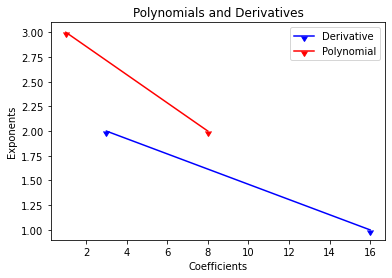

In [28]:
Derivatives, = plt.plot(der_coef, der_exp, '-b', marker=11)
Polynomials, = plt.plot(poly_coef, poly_exp, '-r', marker=11)
plt.xlabel('Coefficients')
plt.ylabel('Exponents')
plt.title('Polynomials and Derivatives')
plt.legend(handles = [Derivatives, Polynomials], labels = ['Derivative', 'Polynomial'])
plt.show()